In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df_raw = pd.read_csv("rawdata/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [5]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
df_train, df_test = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 42)
print("Train data size\t: {}".format(df_train.shape))
print("Test data size\t: {}".format(df_test.shape))

Train data size	: (2623, 19)
Test data size	: (1125, 19)


In [7]:
df_train_x = df_train.drop(["BAD"], axis = 1)

In [8]:
df_train_y = df_train[["BAD"]]

In [9]:
df_test_x = df_test.drop(["BAD"], axis = 1)
df_test_y = df_test[["BAD"]]

In [10]:
tree_uncustomized = DecisionTreeClassifier(random_state = 42)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set\t: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set	: 0.931


In [11]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range (1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 42)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

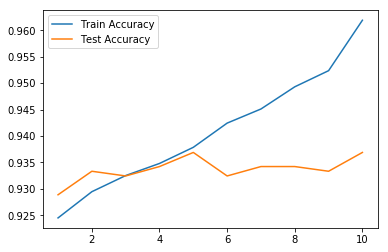

In [12]:
df_accuracy_depth.round(3)
plt.plot(para_depth, train_accuracy, linestyle='-',label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle='-',label="Test Accuracy")
plt.legend()

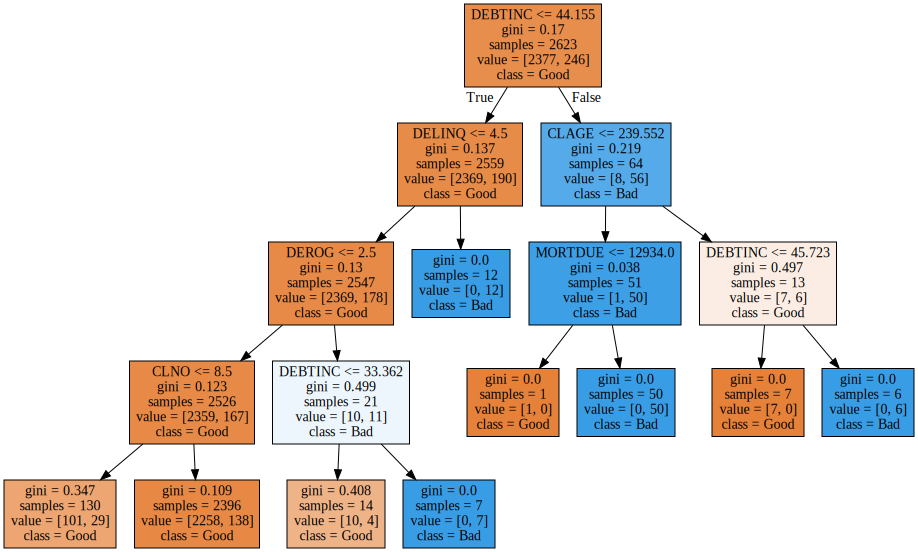

In [15]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier (max_depth = 4, random_state = 42)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True) 

with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))


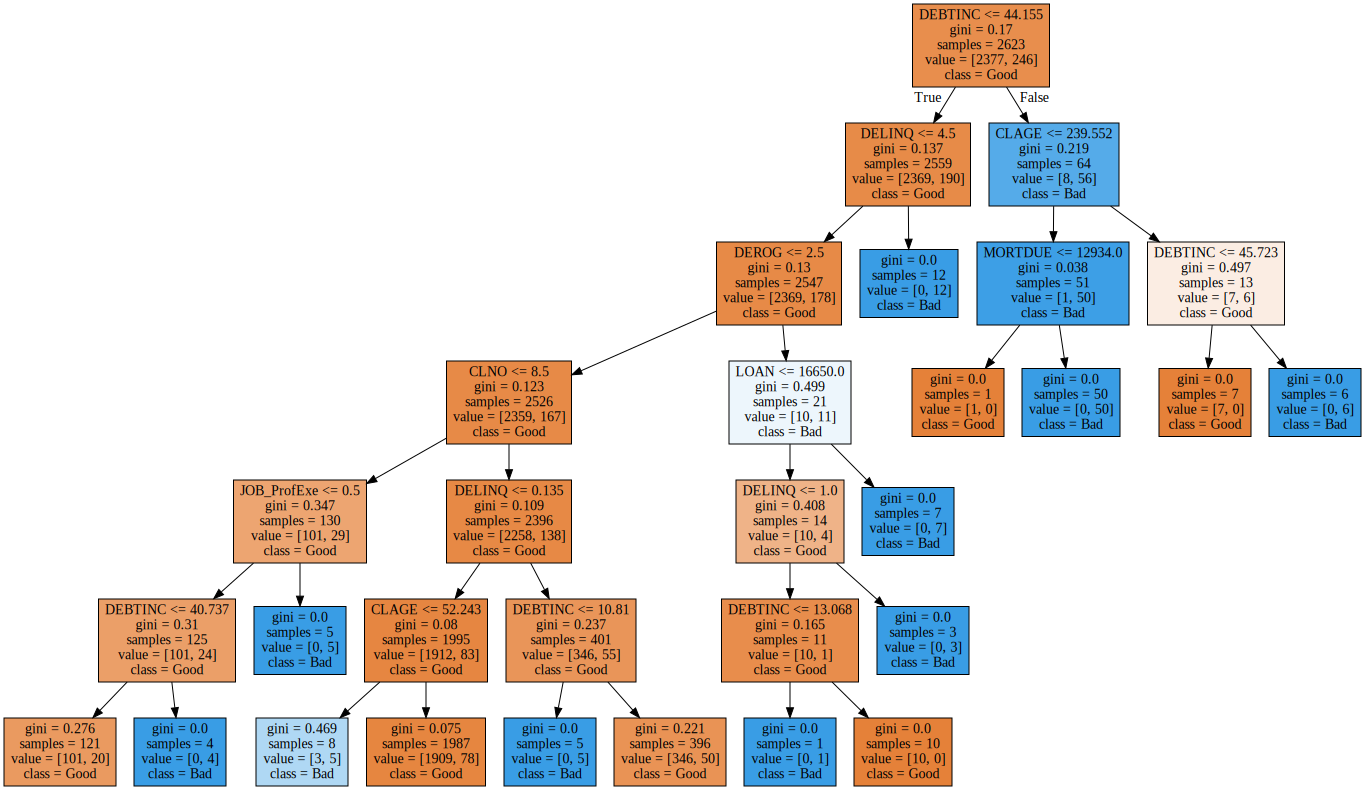

In [16]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier (max_depth = 6, random_state = 42)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True) 

with open("tree_low.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))


In [20]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range (1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 20,
                                 max_depth = 4, random_state = 42)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [21]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.932,0.932
1,4,0.932,0.934
2,6,0.932,0.934
3,8,0.932,0.934
4,10,0.932,0.934
5,12,0.930,0.932
6,14,0.929,0.928
7,16,0.928,0.931
8,18,0.928,0.931
9,20,0.928,0.931


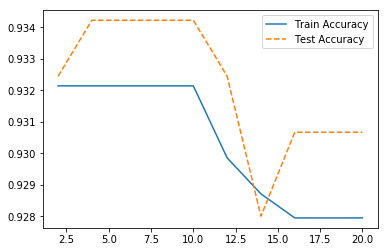

In [22]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label = "Test Accuracy")
plt.legend()

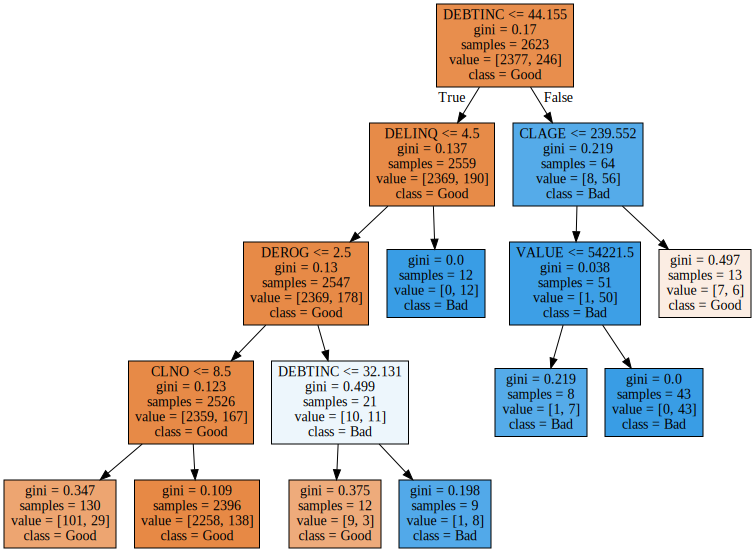

In [26]:
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split=20, min_samples_leaf = 8, random_state = 42)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

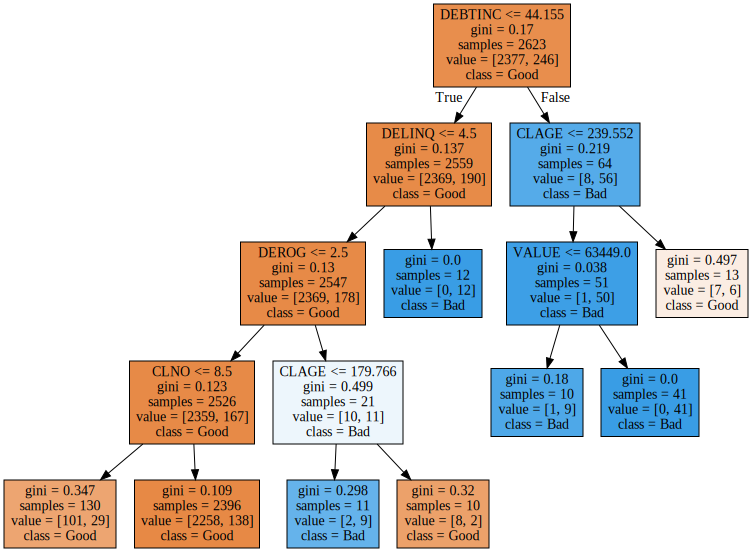

In [27]:
tree_high = DecisionTreeClassifier(max_depth = 4, min_samples_split = 20, min_samples_leaf = 10, random_state = 42)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))